In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import json
from perceptrone import plot, Classifier
%matplotlib inline

In [3]:
d1 = json.load(open('train_01.json'))
d2 = json.load(open('train_02.json'))

In [4]:
d = []
r = {'inside':1, 'outside':-1}
for k in d1.keys():
    _df = pd.DataFrame(d1[k], columns=['A', 'B'])
    _df['class'] = r[k]
    d.append(_df)
df1 = pd.concat(d, axis=0, ignore_index=True)

In [5]:
d = []
r = {'inside':1, 'outside':-1}
for k in d2.keys():
    _df = pd.DataFrame(d2[k], columns=['A', 'B'])
    _df['class'] = r[k]
    d.append(_df)
df2 = pd.concat(d, axis=0, ignore_index=True)

In [6]:
df1

,A,B,class
0,0.729520,0.728634,1
1,0.826506,0.940316,1
2,0.602314,0.489100,1
3,0.792430,0.972460,1
4,0.373906,0.380795,1
5,0.521383,0.701165,1
6,0.579949,0.860210,1
7,0.447271,0.232087,1
8,0.826693,0.970862,1
9,0.209609,0.079489,1


In [23]:
train1, test1 = train_test_split(df1, test_size=0.2)

In [24]:
train2, test2 = train_test_split(df2, test_size=0.2)

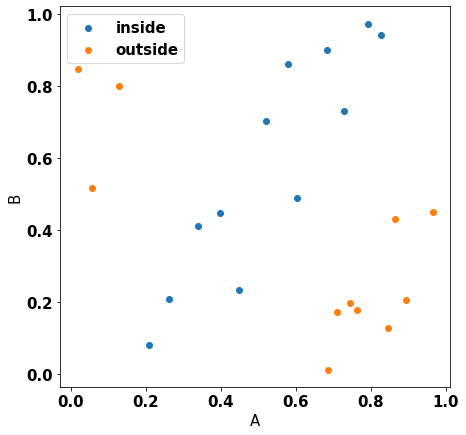

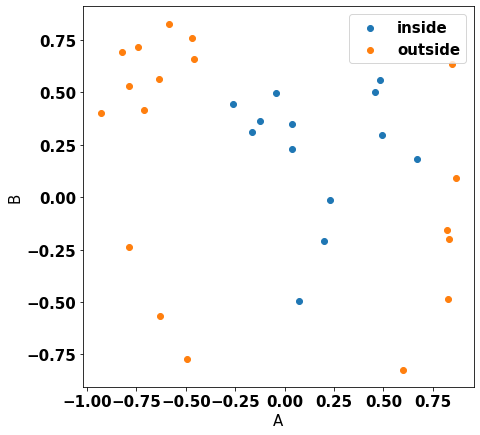

In [25]:
plot(train1)
plot(train2)

# so we need to use quadratic forms

A     0.500213
B     0.499229
A2   -3.713237
B2   -2.375149
AB    4.921632
C     0.095559
Name: 14, dtype: float64


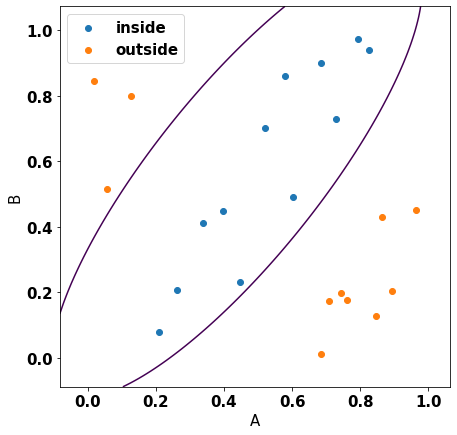

In [26]:
C = Classifier(train1)

In [27]:
dftest1 = C.test(test1)
test1.join(dftest1.set_index(['A', 'B']), on=['A', 'B']).drop(columns=['A2','B2', 'AB','C'])

,A,B,class,class_detected
26,0.250763,0.884590,-1,-1
8,0.826693,0.970862,1,1
17,0.196516,0.756340,-1,-1
15,0.116710,0.852347,-1,-1
4,0.373906,0.380795,1,1
21,0.073085,0.706869,-1,-1


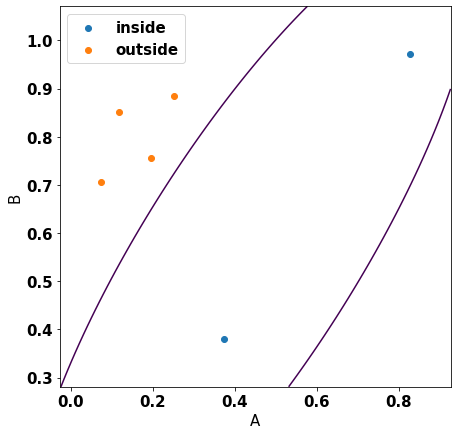

In [28]:
C.plot(test1)

A     1.227229
B     0.424154
A2   -3.561724
B2   -0.910666
AB    0.717402
C     1.141641
Name: 9, dtype: float64


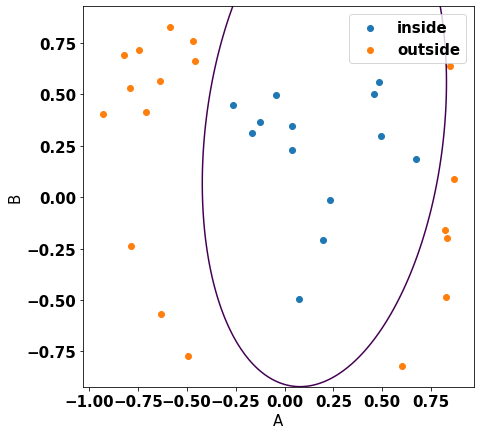

In [29]:
C2 = Classifier(train2)

In [30]:
dftest2 = C2.test(test2)
test2.join(dftest2.set_index(['A', 'B']), on=['A', 'B']).drop(columns=['A2','B2', 'AB','C'])

,A,B,class,class_detected
3,-0.185166,-0.163244,1,1
6,0.619550,0.039807,1,1
16,0.210670,-0.264776,1,1
10,0.642289,-0.003541,1,1
7,0.441863,-0.003950,1,1
8,0.280229,-0.352572,1,1
37,-0.696535,0.034561,-1,-1
33,-0.798888,-0.797275,-1,-1


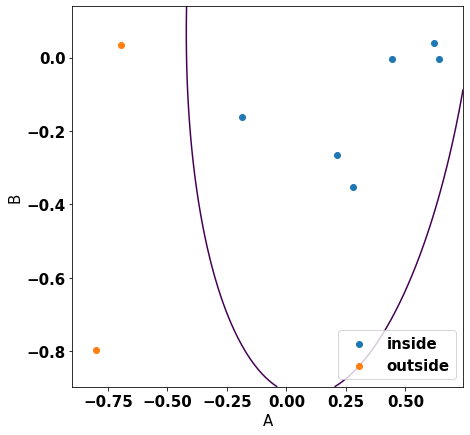

In [31]:
C2.plot(test2)